In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


     |████████████████████████████████| 63 kB 28.6 MB/s 
     |████████████████████████████████| 6.4 MB 21.8 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
smtc = yf.Ticker("SMTC")
slab = yf.Ticker("SLAB")
soxx = yf.Ticker("SOXX")
superPeriod = "15y"
superInterval = "1d"

smdf = pd.DataFrame(smtc.history(start="2007-02-01", end="2022-02-01", interval = superInterval))
sldf = pd.DataFrame(slab.history(start="2007-02-01", end="2022-02-01", interval = superInterval))
sodf = pd.DataFrame(soxx.history(start="2007-02-01", end="2022-02-01", interval = superInterval))

In [ ]:
smdf.head()
sldf.head()
sodf.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2007-02-01,52.008529,52.460406,51.863589,52.281361,211900,0.0,0
2007-02-02,52.485992,52.784401,52.264315,52.613880,247800,0.0,0
2007-02-05,52.792907,53.091319,52.571233,52.809959,106200,0.0,0
2007-02-06,52.750296,52.895239,52.068217,52.613880,177200,0.0,0
2007-02-07,53.193638,53.628465,52.861125,53.321529,332500,0.0,0


In [ ]:
dates_column = range(365)
smdf_close = list(zip(dates_column, smdf["Close"]))
sldf_close = list(zip(dates_column, sldf["Close"]))
sodf_close = list(zip(dates_column, sodf["Close"]))

sm_sl_reg = LinearRegression().fit(smdf_close, sldf_close)
sm_etf_reg = LinearRegression().fit(smdf_close, sodf_close)
sl_etf_reg = LinearRegression().fit(sldf_close, sodf_close)

In [ ]:
print(sm_sl_reg.score(smdf_close, sldf_close))
print(sm_etf_reg.score(smdf_close, sodf_close))
print(sl_etf_reg.score(sldf_close, sodf_close))

0.8444531335737268
0.957756985975375
0.9369919379232666


In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !ls "/content/drive/My Drive/MCap Project"

#/content/drive/Shared with me/MCapProject/FiveFactorData.csv'
#/content/drive/My Drive/MCapProject/FiveFactorData.csv

historical_beta = pd.read_csv('/content/drive/My Drive/MCapProject/FiveFactorData.csv',
                              index_col = 0,
                              parse_dates = [0],
                              skiprows = 3
                              )

In [ ]:
len(historical_beta)
historical_beta.head()

,Mkt-RF,SMB,HML,RMW,CMA,RF
1963-07-01,-0.67,0.01,-0.35,0.03,0.11,0.012
1963-07-02,0.79,-0.31,0.24,-0.08,-0.25,0.012
1963-07-03,0.63,-0.16,-0.09,0.13,-0.24,0.012
1963-07-05,0.40,0.09,-0.26,0.07,-0.28,0.012
1963-07-08,-0.63,0.07,-0.19,-0.27,0.06,0.012


In [ ]:
def compute_stats(returns):
    mu = returns.mean()
    vol = returns.std()
    SR = mu/vol
    cum_returns = (1 + returns).cumprod()
    rolling_max = cum_returns.cummax()
    days_holding = returns.astype(bool).sum()
    PNL = returns[-1]
    # cum_returns = returns.cumsum()
    # drawdown = (cum_returns - rolling_max) / rolling_max
    # max_drawdown = abs(drawdown.min())
    # return pd.Series({'mean return': mu, 'volatility': vol, 'Sharpe ratio': SR, 'Max Drawdown': max_drawdown})
    return pd.Series({"Total return": PNL, 'mean return': mu, 'volatility': vol, 'Sharpe ratio': SR, "Days held": days_holding})

In [ ]:
smdf["Returns"] = smdf["Close"].pct_change()
sldf["Returns"] = sldf["Close"].pct_change()
sodf["Returns"] = sodf["Close"].pct_change()

In [ ]:
smdf["Excess Returns"] = smdf["Returns"] - 0.012
sldf["Excess Returns"] = sldf["Returns"] - 0.012
sodf["Excess Returns"] = sodf["Returns"] - 0.012

In [ ]:
smdf = smdf.loc["2007-02-13":"2021-12-31", ]
sldf = sldf.loc["2007-02-13":"2021-12-31", ]
sodf = sodf.loc["2007-02-13":"2021-12-31", ]
smdf.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Returns,Excess Returns
Date,,,,,,,,,
2007-02-13,14.38,14.45,14.24,14.40,637100,0,0,0.001391,-0.010609
2007-02-14,14.40,14.68,14.36,14.64,635500,0,0,0.016667,0.004667
2007-02-15,14.67,14.68,14.49,14.60,452800,0,0,-0.002732,-0.014732
2007-02-16,14.59,14.59,14.40,14.56,528800,0,0,-0.002740,-0.014740
2007-02-20,14.40,14.51,14.26,14.40,1206600,0,0,-0.010989,-0.022989


In [ ]:
ffdf = historical_beta.loc["2007-02-13":, ]
ffdf.tail()

,Mkt-RF,SMB,HML,RMW,CMA,RF
2021-12-27,1.22,-0.11,0.28,0.97,0.47,0.0
2021-12-28,-0.27,-0.41,0.80,0.83,0.21,0.0
2021-12-29,0.06,-0.01,0.15,0.67,-0.01,0.0
2021-12-30,-0.15,0.06,-0.38,-0.82,-0.41,0.0
2021-12-31,-0.31,0.18,0.53,0.34,0.42,0.0


In [ ]:
x = sm.add_constant(ffdf[["Mkt-RF", "SMB", "HML", "RMW", "CMA"]])
y = smdf["Excess Returns"]

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
model_multi = sm.OLS(y, x).fit()
model_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Excess Returns   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     606.8
Date:                Thu, 03 Mar 2022   Prob (F-statistic):               0.00
Time:                        01:16:06   Log-Likelihood:                 9711.2
No. Observations:                3749   AIC:                        -1.941e+04
Df Residuals:                    3743   BIC:                        -1.937e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0118      0.000    -39.660      0.000      -0.012      -0.011
Mkt-RF         0.0115      0.000     44.410      0.000       0.011       0.012
SMB            0.0081      0.000     16.515      0.000       0.007       0.009
HML           -0.0034      0.000     -8.019      0.000      -0.004      -0.003
RMW           -0.0007      0.001     -0.985      0.325      -0.002       0.001
CMA           -0.0019      0.001     -1.922      0.055      -0.004     3.9e-05
==============================================================================
Omnibus:                      877.734   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13749.269
Skew:                           0.683   Prob(JB):                         0.00
Kurtosis:                      12.282   Cond. No.                         4.71
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
mkt_beta = model_multi.params["Mkt-RF"]
mkt_beta

0.011455531873227896

In [ ]:
x = sm.add_constant(ffdf[["Mkt-RF", "SMB", "HML", "RMW", "CMA"]])
y = sldf["Excess Returns"]
model_multi2 = sm.OLS(y, x).fit()
model_multi2.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Excess Returns   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     542.0
Date:                Sat, 26 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:13:56   Log-Likelihood:                 9810.0
No. Observations:                3749   AIC:                        -1.961e+04
Df Residuals:                    3743   BIC:                        -1.957e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0118      0.000    -40.615      0.000      -0.012      -0.011
Mkt-RF         0.0107      0.000     42.589      0.000       0.010       0.011
SMB            0.0066      0.000     13.801      0.000       0.006       0.008
HML           -0.0030      0.000     -7.326      0.000      -0.004      -0.002
RMW           -0.0008      0.001     -1.111      0.267      -0.002       0.001
CMA           -0.0023      0.001     -2.371      0.018      -0.004      -0.000
==============================================================================
Omnibus:                     1067.688   Durbin-Watson:                   2.125
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            73101.620
Skew:                           0.438   Prob(JB):                         0.00
Kurtosis:                      24.615   Cond. No.                         4.71
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
x = sm.add_constant(ffdf[["Mkt-RF", "SMB", "HML", "RMW", "CMA"]])
y = sodf["Excess Returns"]
model_multi3 = sm.OLS(y, x).fit()
model_multi3.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Excess Returns   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     1874.
Date:                Sat, 26 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:13:56   Log-Likelihood:                 12027.
No. Observations:                3749   AIC:                        -2.404e+04
Df Residuals:                    3743   BIC:                        -2.400e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0118      0.000    -73.460      0.000      -0.012      -0.011
Mkt-RF         0.0119      0.000     85.278      0.000       0.012       0.012
SMB            0.0025      0.000      9.237      0.000       0.002       0.003
HML           -0.0032      0.000    -14.103      0.000      -0.004      -0.003
RMW           -0.0014      0.000     -3.584      0.000      -0.002      -0.001
CMA           -0.0014      0.001     -2.636      0.008      -0.002      -0.000
==============================================================================
Omnibus:                      320.600   Durbin-Watson:                   2.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1677.495
Skew:                           0.224   Prob(JB):                         0.00
Kurtosis:                       6.246   Cond. No.                         4.71
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
training_data = ffdf.loc["2007-02-13":"2016-12-31",]
training_data["SMTC"] = smdf["Excess Returns"].loc["2007-02-13":"2016-12-31",]
training_data["SOXX"] = sodf["Excess Returns"].loc["2007-02-13":"2016-12-31",]
training_data["SLAB"] = sldf["Excess Returns"].loc["2007-02-13":"2016-12-31",]
training_data.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,Mkt-RF,SMB,HML,RMW,CMA,RF,SMTC,SOXX,SLAB
2016-12-23,0.19,0.52,-0.50,-0.40,-0.15,0.001,0.011810,-0.006875,0.005665
2016-12-27,0.27,0.23,0.14,0.14,0.04,0.001,-0.004248,0.000348,-0.002189
2016-12-28,-0.87,-0.29,0.09,0.19,-0.15,0.001,-0.019692,-0.030965,-0.031432
2016-12-29,-0.04,0.10,-0.33,0.27,0.02,0.001,-0.018202,-0.012161,-0.003616
2016-12-30,-0.52,-0.06,0.20,-0.09,0.03,0.001,-0.027601,-0.027483,-0.029385


In [ ]:
x = sm.add_constant(training_data[["Mkt-RF", "SMB", "HML", "RMW", "CMA"]])
smtc_y = training_data["SMTC"]
soxx_y = training_data["SOXX"]
slab_y = training_data["SLAB"]
model_multi1 = sm.OLS(smtc_y, x).fit()
model_multi1.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   SMTC   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     351.4
Date:                Sat, 26 Feb 2022   Prob (F-statistic):          2.61e-285
Time:                        22:13:56   Log-Likelihood:                 6534.8
No. Observations:                2490   AIC:                        -1.306e+04
Df Residuals:                    2484   BIC:                        -1.302e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0118      0.000    -33.353      0.000      -0.012      -0.011
Mkt-RF         0.0099      0.000     31.233      0.000       0.009       0.011
SMB            0.0076      0.001     11.934      0.000       0.006       0.009
HML           -0.0031      0.001     -5.085      0.000      -0.004      -0.002
RMW           -0.0036      0.001     -3.256      0.001      -0.006      -0.001
CMA            0.0005      0.001      0.425      0.671      -0.002       0.003
==============================================================================
Omnibus:                      515.310   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10029.798
Skew:                           0.446   Prob(JB):                         0.00
Kurtosis:                      12.792   Cond. No.                         5.26
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model_multi2 = sm.OLS(soxx_y, x).fit()
model_multi2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   SOXX   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     1200.
Date:                Sat, 26 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:13:56   Log-Likelihood:                 8035.4
No. Observations:                2490   AIC:                        -1.606e+04
Df Residuals:                    2484   BIC:                        -1.602e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0118      0.000    -61.384      0.000      -0.012      -0.011
Mkt-RF         0.0110      0.000     63.487      0.000       0.011       0.011
SMB            0.0025      0.000      7.173      0.000       0.002       0.003
HML           -0.0034      0.000    -10.214      0.000      -0.004      -0.003
RMW           -0.0044      0.001     -7.303      0.000      -0.006      -0.003
CMA           -0.0004      0.001     -0.557      0.577      -0.002       0.001
==============================================================================
Omnibus:                      236.052   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1381.158
Skew:                           0.230   Prob(JB):                    1.22e-300
Kurtosis:                       6.620   Cond. No.                         5.26
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model_multi3 = sm.OLS(slab_y, x).fit()
model_multi3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   SLAB   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     305.0
Date:                Sat, 26 Feb 2022   Prob (F-statistic):          5.11e-255
Time:                        22:13:56   Log-Likelihood:                 6640.6
No. Observations:                2490   AIC:                        -1.327e+04
Df Residuals:                    2484   BIC:                        -1.323e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0117      0.000    -34.679      0.000      -0.012      -0.011
Mkt-RF         0.0086      0.000     28.333      0.000       0.008       0.009
SMB            0.0060      0.001      9.844      0.000       0.005       0.007
HML           -0.0035      0.001     -5.980      0.000      -0.005      -0.002
RMW           -0.0062      0.001     -5.880      0.000      -0.008      -0.004
CMA           -0.0016      0.001     -1.271      0.204      -0.004       0.001
==============================================================================
Omnibus:                      617.127   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37701.211
Skew:                          -0.132   Prob(JB):                         0.00
Kurtosis:                      22.061   Cond. No.                         5.26
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
smtc_params = model_multi1.params
soxx_params = model_multi2.params
slab_params = model_multi3.params
slab_params

const    -0.011719
Mkt-RF    0.008593
SMB       0.005971
HML      -0.003456
RMW      -0.006196
CMA      -0.001563
dtype: float64

In [ ]:
testing_data = ffdf.loc["2016-12-31":,]
testing_data["SMTC"] = smdf["Excess Returns"].loc["2016-12-31":,]
testing_data["SOXX"] = sodf["Excess Returns"].loc["2016-12-31":,]
testing_data["SLAB"] = sldf["Excess Returns"].loc["2016-12-31":,]
testing_data.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,Mkt-RF,SMB,HML,RMW,CMA,RF,SMTC,SOXX,SLAB
2021-12-27,1.22,-0.11,0.28,0.97,0.47,0.0,0.025855,0.015403,0.002332
2021-12-28,-0.27,-0.41,0.80,0.83,0.21,0.0,-0.024749,-0.023033,-0.026899
2021-12-29,0.06,-0.01,0.15,0.67,-0.01,0.0,-0.003466,-0.010471,-0.002145
2021-12-30,-0.15,0.06,-0.38,-0.82,-0.41,0.0,-0.026252,-0.023314,-0.015865
2021-12-31,-0.31,0.18,0.53,0.34,0.42,0.0,-0.007482,-0.015015,-0.010885


In [ ]:
testing_dates = testing_data.index
smtc_expected = pd.Series()
soxx_expected = pd.Series()
slab_expected = pd.Series()
smtc_expected = testing_data["Mkt-RF"] * smtc_params["Mkt-RF"] \
  + testing_data["SMB"] * smtc_params["SMB"] \
  + testing_data["HML"] * smtc_params["HML"] \
  + testing_data["RMW"] * smtc_params["RMW"] \
  + testing_data["CMA"] * smtc_params["CMA"] \
  + smtc_params["const"]
soxx_expected = testing_data["Mkt-RF"] * soxx_params["Mkt-RF"] \
  + testing_data["SMB"] * soxx_params["SMB"] \
  + testing_data["HML"] * soxx_params["HML"] \
  + testing_data["RMW"] * soxx_params["RMW"] \
  + testing_data["CMA"] * soxx_params["CMA"] \
  + soxx_params["const"]
slab_expected = testing_data["Mkt-RF"] * slab_params["Mkt-RF"] \
  + testing_data["SMB"] * slab_params["SMB"] \
  + testing_data["HML"] * slab_params["HML"] \
  + testing_data["RMW"] * slab_params["RMW"] \
  + testing_data["CMA"] * slab_params["CMA"] \
  + slab_params["const"]
slab_expected.head()

expected = pd.DataFrame([smtc_expected, soxx_expected, slab_expected])
expected = expected.transpose()

expected.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


,0,1,2
2017-01-03,-0.003489,-0.002221,-0.004326
2017-01-04,0.005604,0.002029,0.004590
2017-01-05,-0.018332,-0.012975,-0.015307
2017-01-06,-0.012438,-0.007786,-0.009909
2017-01-09,-0.015545,-0.013622,-0.013327


In [ ]:
trading = pd.DataFrame()
trading["SMTC"] = testing_data["SMTC"]
trading["SOXX"] = testing_data["SOXX"]
trading["SLAB"] = testing_data["SLAB"]
trading["SMTC_EV"] = expected[0]
trading["SOXX_EV"] = expected[1]
trading["SLAB_EV"] = expected[2]
trading.head()

residuals = pd.DataFrame()
residuals["SMTC"] = trading["SMTC"] - trading["SMTC_EV"]
residuals["SOXX"] = trading["SOXX"] - trading["SOXX_EV"]
residuals["SLAB"] = trading["SLAB"] - trading["SLAB_EV"]
residuals.head()

# sigma_smtc = residuals["SMTC"].std()

SMTC_stats = compute_stats(residuals["SOXX"])
# residuals["SMTC"]
# SMTC_stats = compute_stats(trading["SMTC_EV"])
SMTC_stats

Total return       0.003240
mean return        0.000472
volatility         0.010456
Sharpe ratio       0.045128
Days held       1259.000000
dtype: float64

In [ ]:
strat = pd.DataFrame()
strat["SMTC_EVR"] = trading["SMTC_EV"].rolling(6).mean()
strat["SOXX_EVR"] = trading["SOXX_EV"].rolling(6).mean()
strat["SLAB_EVR"] = trading["SLAB_EV"].rolling(6).mean()
strat = strat.loc["2017-01-10":,]

In [ ]:
strat

,SMTC_EVR,SOXX_EVR,SLAB_EVR
2017-01-10,-0.008125,-0.007324,-0.007466
2017-01-11,-0.009535,-0.008862,-0.008928
2017-01-12,-0.013341,-0.011521,-0.012195
2017-01-13,-0.010826,-0.010289,-0.010205
2017-01-17,-0.012700,-0.012336,-0.012471
...,...,...,...
2021-12-27,-0.001263,-0.002252,-0.001389
2021-12-28,-0.006011,-0.005959,-0.007237
2021-12-29,-0.004260,-0.004209,-0.006076
2021-12-30,-0.008551,-0.008369,-0.009734


In [ ]:
def inPosition(ev1, ev2, param):
  if (ev1 - ev2 > param):
    return 1
  elif (ev2 - ev1 > param):
    return -1
  else:
    return 0

In [ ]:
PARAM = 0.002
strat['SMTC_pos'] = strat.apply(lambda row : inPosition(row["SMTC_EVR"], row["SOXX_EVR"], PARAM), axis = 1)
strat["SLAB_pos"] = strat.apply(lambda row : inPosition(row["SLAB_EVR"], row["SOXX_EVR"], PARAM), axis = 1)
strat.astype(bool).sum(axis=0)

SMTC_EVR    1254
SOXX_EVR    1254
SLAB_EVR    1254
SMTC_pos     174
SLAB_pos     125
dtype: int64

In [ ]:
strat["SMTC_pos"].sum()
strat

,SMTC_EVR,SOXX_EVR,SLAB_EVR,SMTC_pos,SLAB_pos
2017-01-10,-0.008125,-0.007324,-0.007466,0,0
2017-01-11,-0.009535,-0.008862,-0.008928,0,0
2017-01-12,-0.013341,-0.011521,-0.012195,0,0
2017-01-13,-0.010826,-0.010289,-0.010205,0,0
2017-01-17,-0.012700,-0.012336,-0.012471,0,0
...,...,...,...,...,...
2021-12-27,-0.001263,-0.002252,-0.001389,0,0
2021-12-28,-0.006011,-0.005959,-0.007237,0,0
2021-12-29,-0.004260,-0.004209,-0.006076,0,0
2021-12-30,-0.008551,-0.008369,-0.009734,0,0


In [ ]:
def returnPosition(low, high):

  LOW_PARAM = low
  HIGH_PARAM = high

  decisions1 = [0]
  decisions2 = [0]

  for i in range(1, len(strat)):
    if strat['SMTC_pos'][i-1] == 0:
      decisions1.append(inPosition(strat["SMTC_EVR"][i], strat["SOXX_EVR"][i], HIGH_PARAM))
    else:
      decisions1.append(inPosition(strat["SMTC_EVR"][i], strat["SOXX_EVR"][i], LOW_PARAM))
    if strat['SLAB_pos'][i-1] == 0:
      decisions2.append(inPosition(strat["SLAB_EVR"][i], strat["SOXX_EVR"][i], HIGH_PARAM))
    else:
      decisions2.append(inPosition(strat["SLAB_EVR"][i], strat["SOXX_EVR"][i], LOW_PARAM))

  strat["SMTC_pos"] = pd.Series(decisions1, index = strat.index)
  strat["SLAB_pos"] = pd.Series(decisions2, index = strat.index)

  return strat

# print(decisions1)
# print(sum(decisions1))
# print(pd.Series(decisions1))

strat

,SMTC_EVR,SOXX_EVR,SLAB_EVR,SMTC_pos,SLAB_pos
2017-01-10,-0.008125,-0.007324,-0.007466,0,0
2017-01-11,-0.009535,-0.008862,-0.008928,0,0
2017-01-12,-0.013341,-0.011521,-0.012195,0,0
2017-01-13,-0.010826,-0.010289,-0.010205,0,0
2017-01-17,-0.012700,-0.012336,-0.012471,0,0
...,...,...,...,...,...
2021-12-27,-0.001263,-0.002252,-0.001389,0,0
2021-12-28,-0.006011,-0.005959,-0.007237,0,0
2021-12-29,-0.004260,-0.004209,-0.006076,0,0
2021-12-30,-0.008551,-0.008369,-0.009734,0,0


In [ ]:
strat.head(30)

,SMTC_EVR,SOXX_EVR,SLAB_EVR,SMTC_pos,SLAB_pos
2017-01-10,-0.008125,-0.007324,-0.007466,0,0
2017-01-11,-0.009535,-0.008862,-0.008928,0,0
2017-01-12,-0.013341,-0.011521,-0.012195,0,0
2017-01-13,-0.010826,-0.010289,-0.010205,0,0
2017-01-17,-0.012700,-0.012336,-0.012471,0,0
2017-01-18,-0.011500,-0.011580,-0.011679,0,0
2017-01-19,-0.013925,-0.012797,-0.013473,0,0
2017-01-20,-0.013420,-0.012447,-0.012953,0,0
2017-01-23,-0.013182,-0.012764,-0.013042,0,0
2017-01-24,-0.012470,-0.012277,-0.012812,0,0


In [ ]:
strat.astype(bool).sum(axis = 0)

SMTC_EVR    1254
SOXX_EVR    1254
SLAB_EVR    1254
SMTC_pos     174
SLAB_pos     125
dtype: int64

In [ ]:
def ratio(instr1, instr2, inout):
  # ratio2 contains etf used as base
  #inout expects 1 for long, -1 for short
  # instrs contain asset prices

  ratio = instr2 / instr1

  return (inout * ratio, inout * -1)

# ratio(5, 4, 1)

In [ ]:
def populate_positions():
  pos1 = [(0,0)]
  p = 0

  for i in range(1, len(strat)):
    present = strat["SMTC_pos"][i]
    past = strat["SMTC_pos"][i-1]
    if past == 0 and present == 1:
      time = strat.index[i]
      p1 = smdf.loc[time]["Close"]
      p2 = sodf.loc[time]["Close"]
      pos1.append(ratio(p1, p2, 1))
    elif past == 0 and present == -1:
      time = strat.index[i]
      p1 = smdf.loc[time]["Close"]
      p2 = sodf.loc[time]["Close"]
      pos1.append(ratio(p1, p2, -1))
    elif present == 0:
      pos1.append((0,0))
    elif (past == 1 and present == -1) or (past == -1 and present == 1):
      time = strat.index[i]
      p1 = smdf.loc[time]["Close"]
      p2 = sodf.loc[time]["Close"]
      pos1.append(ratio(p1, p2, -past))
    else:
      pos1.append(pos1[-1])

  # strat["pos1"] = pos1

  pos2 = [(0,0)]


  for i in range(1, len(strat)):
    present = strat["SLAB_pos"][i]
    past = strat["SLAB_pos"][i-1]
    if past == 0 and present == 1:
      time = strat.index[i]
      p1 = sldf.loc[time]["Close"]
      p2 = sodf.loc[time]["Close"]
      pos2.append(ratio(p1, p2, 1))
    elif past == 0 and present == -1:
      time = strat.index[i]
      p1 = sldf.loc[time]["Close"]
      p2 = sodf.loc[time]["Close"]
      pos2.append(ratio(p1, p2, -1))
    elif (past == 1 and present == -1) or (past == -1 and present == 1):
      time = strat.index[i]
      p1 = sldf.loc[time]["Close"]
      p2 = sodf.loc[time]["Close"]
      pos2.append(ratio(p1, p2, -past))
    elif present == 0:
      pos2.append((0,0))
    else:
      pos2.append(pos1[-1])

  strat["SMTC_pair"] = pd.Series(pos1, index = strat.index)
  strat["SLAB_pair"] = pd.Series(pos2, index = strat.index)

  return strat

strat

# strat.astype(bool).sum(axis=0)

,SMTC_EVR,SOXX_EVR,SLAB_EVR,SMTC_pos,SLAB_pos
2017-01-10,-0.008125,-0.007324,-0.007466,0,0
2017-01-11,-0.009535,-0.008862,-0.008928,0,0
2017-01-12,-0.013341,-0.011521,-0.012195,0,0
2017-01-13,-0.010826,-0.010289,-0.010205,0,0
2017-01-17,-0.012700,-0.012336,-0.012471,0,0
...,...,...,...,...,...
2021-12-27,-0.001263,-0.002252,-0.001389,0,0
2021-12-28,-0.006011,-0.005959,-0.007237,0,0
2021-12-29,-0.004260,-0.004209,-0.006076,0,0
2021-12-30,-0.008551,-0.008369,-0.009734,0,0


In [ ]:

def compute_results():
  assets = pd.DataFrame()
  assets.index = strat.index

  smtcpos = []
  soxxpos = []
  slabpos = []

  for i in range(len(strat)):
    smtcpos.append(strat["SMTC_pair"][i][0])
    soxxpos.append(strat["SMTC_pair"][i][1] + strat["SLAB_pair"][i][1])
    slabpos.append(strat["SLAB_pair"][i][0])

  assets["SMTCpos"] = smtcpos
  assets["SOXXpos"] = soxxpos
  assets["SLABpos"] = slabpos

  assets["SMTCprice"] = smdf["Close"]
  assets["SOXXprice"] = sodf["Close"]
  assets["SLABprice"] = sldf["Close"]

  assets["Value"] = assets["SMTCpos"] * assets["SMTCprice"] + assets["SOXXpos"] * assets["SOXXprice"] + assets["SLABpos"] * assets["SLABprice"]

  assets["Total PNL"] = assets["Value"].cumsum()
  assets["Daily Return"] = assets["Total PNL"].pct_change()

  return(assets)

In [ ]:
def compute_with_params(low, high):
  returnPosition(low, high)
  populate_positions()
  assets = compute_results()
  return compute_stats(assets["Total PNL"])

In [ ]:
def max_drawdown(returns):
  rolling_max = returns.cummax()
  drawdown = (returns - rolling_max) / rolling_max
  max_drawdown = drawdown.min()
  return max_drawdown

In [ ]:
returnPosition(0.0005, 0.004)
populate_positions()
assets = compute_results()
assets

,SMTCpos,SOXXpos,SLABpos,SMTCprice,SOXXprice,SLABprice,Value,Total PNL,Daily Return
2017-01-10,0.0,0,0.0,32.299999,118.127380,66.349998,0.0,0.000000,NaN
2017-01-11,0.0,0,0.0,32.700001,118.534119,67.000000,0.0,0.000000,NaN
2017-01-12,0.0,0,0.0,32.000000,117.540901,66.349998,0.0,0.000000,NaN
2017-01-13,0.0,0,0.0,32.900002,118.307091,68.250000,0.0,0.000000,NaN
2017-01-17,0.0,0,0.0,32.599998,116.405785,66.199997,0.0,0.000000,NaN
...,...,...,...,...,...,...,...,...,...
2021-12-27,0.0,0,0.0,90.199997,555.473511,208.070007,0.0,213.980406,0.0
2021-12-28,0.0,0,0.0,89.050003,549.345215,204.970001,0.0,213.980406,0.0
2021-12-29,0.0,0,0.0,89.809998,550.185059,206.990005,0.0,213.980406,0.0
2021-12-30,0.0,0,0.0,88.529999,543.960022,206.190002,0.0,213.980406,0.0


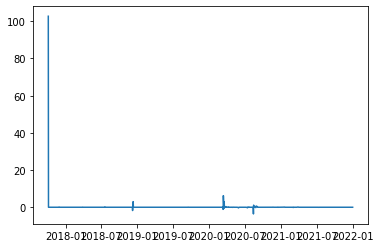

In [ ]:
plt.plot(assets["Daily Return"])